In [1]:
! python -m pip install scikit-image

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
from skimage.data import imread

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



ImportError: cannot import name 'imread' from 'skimage.data' (/opt/conda/lib/python3.7/site-packages/skimage/data/__init__.py)

In [3]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In this competition, you are required to locate ships in images, and put an aligned bounding box segment around the ships you locate. Many images do not contain ships, and those that do may contain multiple ships. Ships within and across images may differ in size (sometimes significantly) and be located in open sea, at docks, marinas, etc.

For this metric, object segments cannot overlap. There were a small percentage of images in both the Train and Test set that had slight overlap of object segments when ships were directly next to each other. Any segments overlaps were removed by setting them to background (i.e., non-ship) encoding. Therefore, some images have a ground truth may be an aligned bounding box with some pixels removed from an edge of the segment****

In [4]:
df = pd.read_csv('/kaggle/input/airbus-ship-detection/')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [5]:
df.head()

NameError: name 'df' is not defined

In [6]:
sub = pd.read_csv("/kaggle/input/airbus-ship-detection/sample_submission_v2.csv")

In [7]:
sub.head()

ImageId EncodedPixels
0  00002bd58.jpg           1 2
1  00015efb6.jpg           1 2
2  00023d5fc.jpg           1 2
3  000367c13.jpg           1 2
4  0008ca6e9.jpg           1 2

In [8]:
sub.to_csv("submission.csv", index=False)

In [9]:
ship_segmentation = pd.read_csv("/kaggle/input/airbus-ship-detection/train_ship_segmentations_v2.csv")
ship_segmentation.shape

(231723, 2)

In [10]:
ship_segmentation.head()

ImageId                                      EncodedPixels
0  00003e153.jpg                                                NaN
1  0001124c7.jpg                                                NaN
2  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...
3  000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...
4  000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...

In [11]:
! ls ../input/airbus-ship-detection/

sample_submission_v2.csv  test_v2  train_ship_segmentations_v2.csv  train_v2


In [12]:
import os

train = os.listdir("../input/airbus-ship-detection/train_v2")
print("No of train files", len(train))

test = os.listdir("../input/airbus-ship-detection/test_v2")
print("No of test files", len(test))

No of train files 192556
No of test files 15606


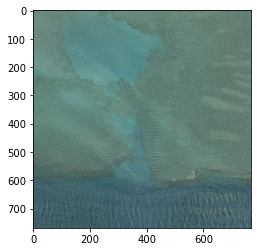

In [13]:
import matplotlib.pyplot as plt

image = plt.imread("/kaggle/input/airbus-ship-detection/train_v2/80cc0fc0a.jpg")

plt.imshow(image)

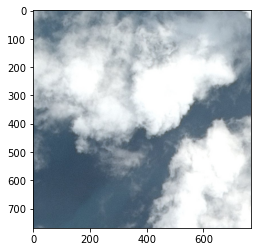

In [14]:
image = plt.imread("/kaggle/input/airbus-ship-detection/train_v2/a333724d7.jpg")

plt.imshow(image)

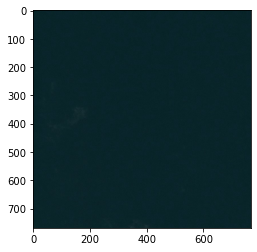

In [15]:
image = plt.imread("/kaggle/input/airbus-ship-detection/train_v2/726a42bd7.jpg")

plt.imshow(image)

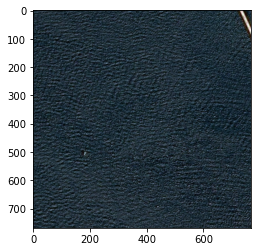

In [16]:
image = plt.imread("/kaggle/input/airbus-ship-detection/train_v2/928ed328a.jpg")

plt.imshow(image)


In [17]:
sample = ship_segmentation.sample(100)

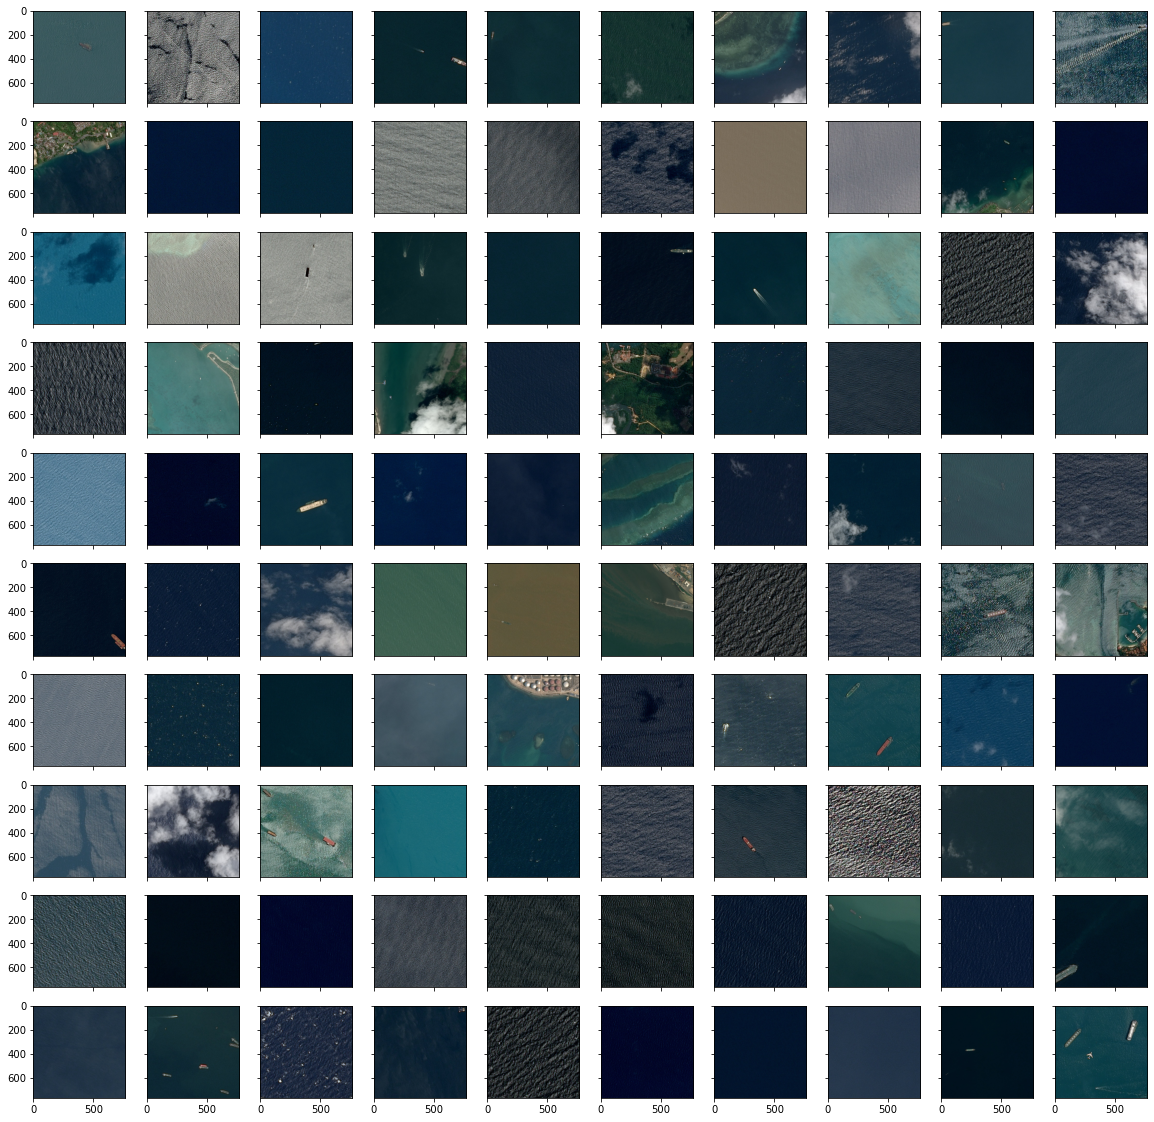

In [18]:
fig, ax = plt.subplots(10, 10, sharex='col', sharey='row')
fig.set_size_inches(20, 20)

for i, imgid in enumerate(sample.ImageId):
    col = i % 10
    row = i // 10
    
    path = Path('../input/airbus-ship-detection/train_v2/') / '{}'.format(imgid)
    img = plt.imread(path)
    
    ax[row, col].imshow(img)

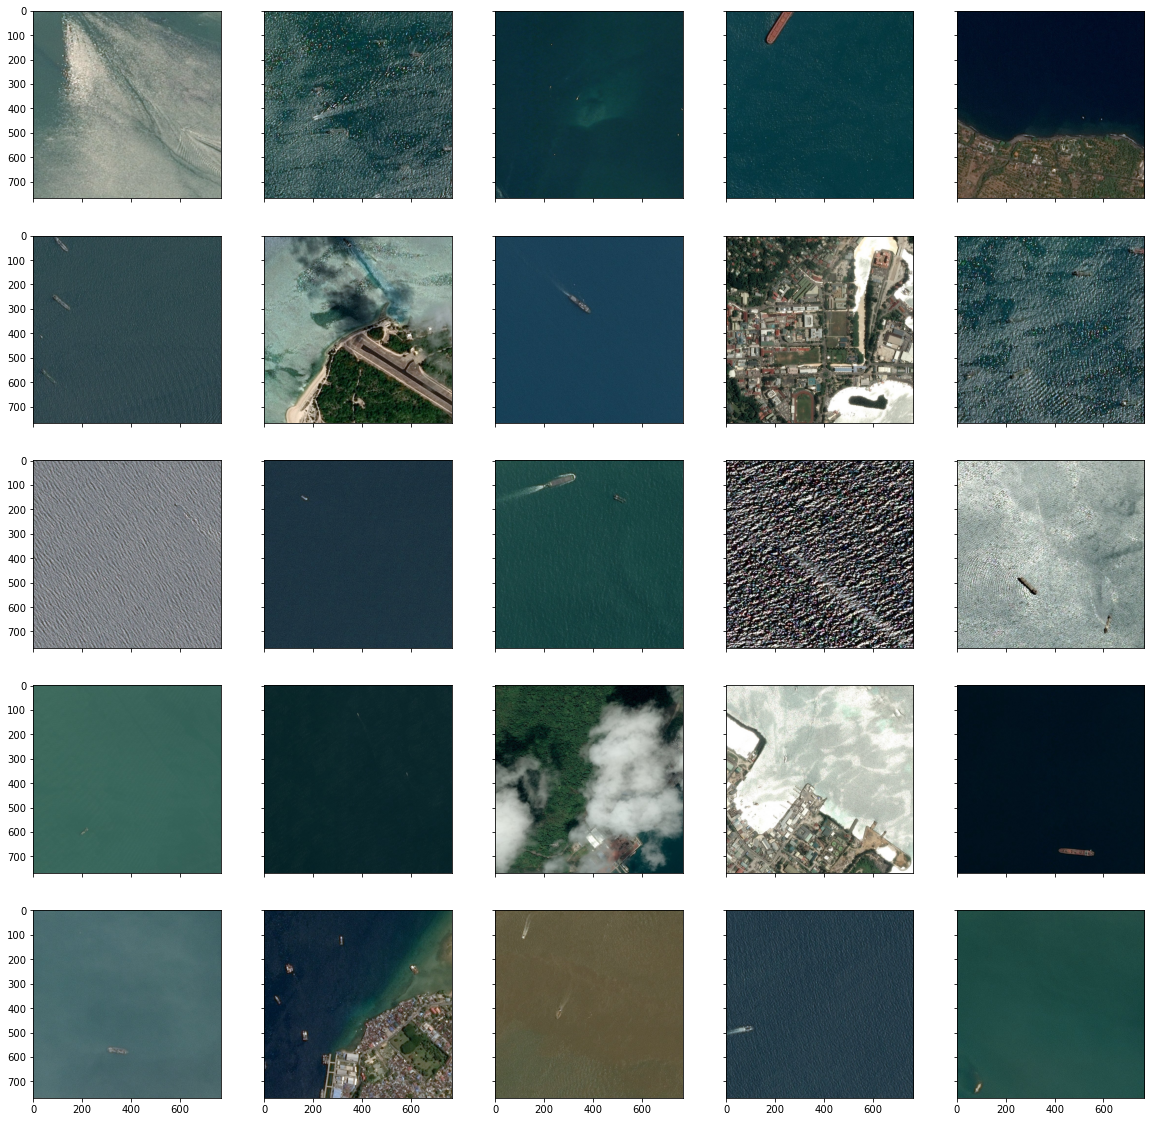

In [19]:
sample = ship_segmentation[~ship_segmentation.EncodedPixels.isna()].sample(25)

fig, ax = plt.subplots(5, 5, sharex='col', sharey='row')
fig.set_size_inches(20, 20)

for i, imgid in enumerate(sample.ImageId):
    col = i % 5
    row = i // 5
    
    path = Path('../input/airbus-ship-detection/train_v2/') / '{}'.format(imgid)
    img = plt.imread(path)
    
    ax[row, col].imshow(img)

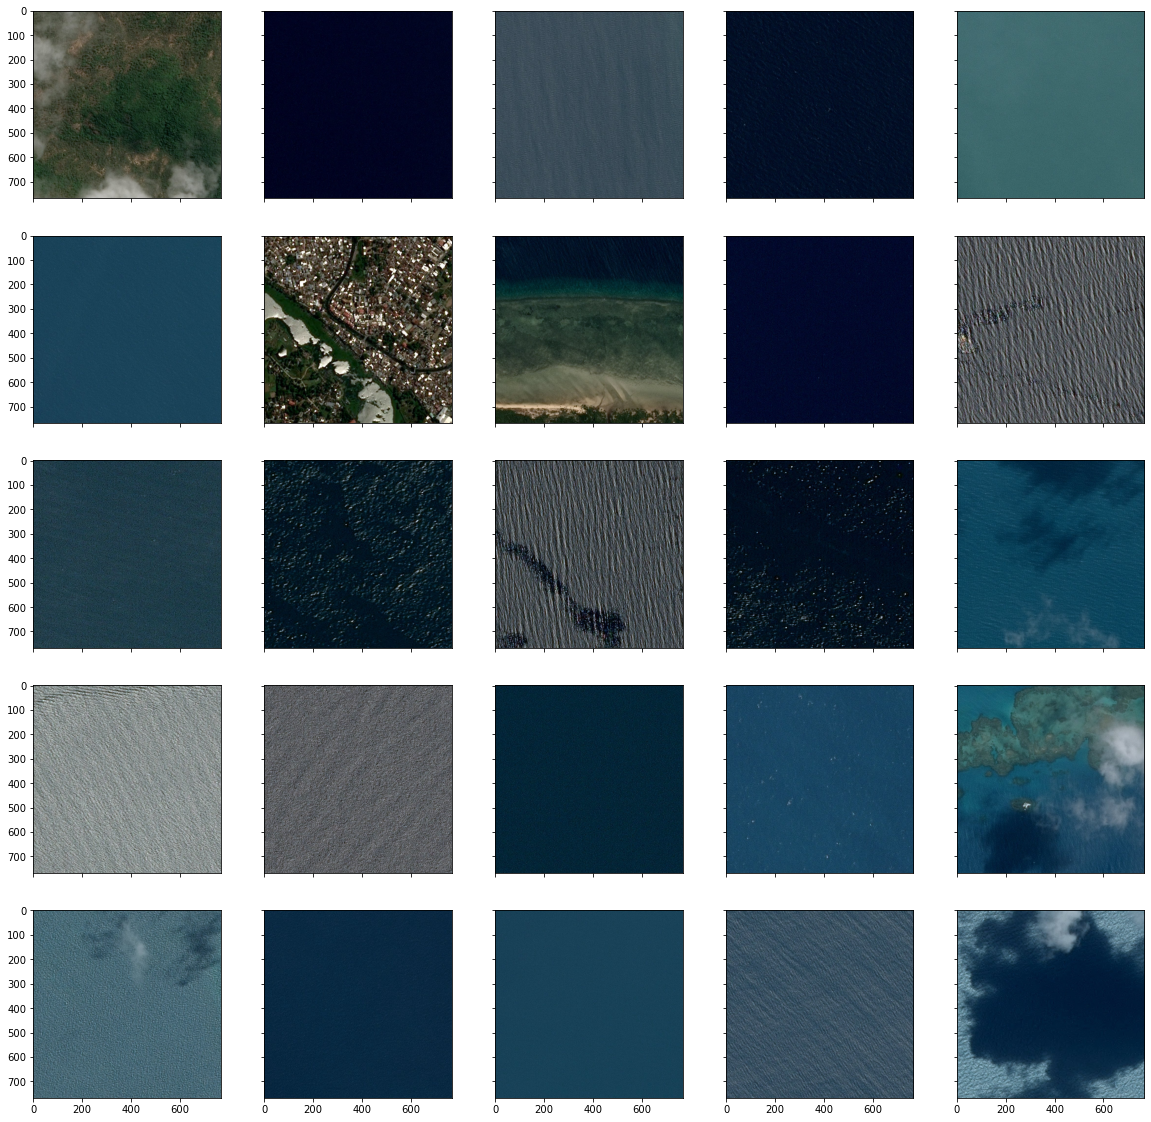

In [20]:
sample = ship_segmentation[ship_segmentation.EncodedPixels.isna()].sample(25)

fig, ax = plt.subplots(5, 5, sharex='col', sharey='row')
fig.set_size_inches(20, 20)

for i, imgid in enumerate(sample.ImageId):
    col = i % 5
    row = i // 5
    
    path = Path('../input/airbus-ship-detection/train_v2/') / '{}'.format(imgid)
    img = plt.imread(path)
    
    ax[row, col].imshow(img)

In [21]:
sample

ImageId EncodedPixels
74299   5229f888b.jpg           NaN
224992  f88f15ed4.jpg           NaN
122021  86a9e0c46.jpg           NaN
138373  98b895542.jpg           NaN
82424   5b0bbbdba.jpg           NaN
148971  a48c880ba.jpg           NaN
69522   4d0828877.jpg           NaN
107710  7690d971c.jpg           NaN
210317  e8772da84.jpg           NaN
103343  71e755a17.jpg           NaN
174374  c0b0ccdf4.jpg           NaN
60792   4354e85ca.jpg           NaN
102327  70dba6b17.jpg           NaN
61119   43b880adb.jpg           NaN
177787  c47418c1f.jpg           NaN
134376  9446dfc5b.jpg           NaN
21985   18566ab34.jpg           NaN
22436   18e4dd240.jpg           NaN
210637  e8cbd6eb6.jpg           NaN
141881  9c839e824.jpg           NaN
18716   14ab7cc63.jpg           NaN
123766  88ac0aab7.jpg           NaN
55603   3dc5e3a1a.jpg           NaN
141995  9c9f974b4.jpg           NaN
107698  768d0961a.jpg           NaN